In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from utils.metrics import calculate_metrics
import os

plt.style.use("default")
plt.rcParams.update({
    #"text.usetex": False,
    #"font.family": "serif",
    #"font.serif": ["Helvetica"],
    'figure.dpi': 200,  # renders images larger for notebook
    'axes.grid': True,
    'grid.alpha': 0.3,

})

DATA_SOURCE = Path.cwd().parent / 'data' / 'additional_data' / 'ploss_pred_cnn_gbm' / 'ploss_pred_cnn_gbm'

['other', 'square', 'triangular', 'sine'] [0.02393232 0.02828127 0.0218819  0.02755636]
['other', 'square', 'triangular', 'sine'] [0.02186477 0.02776678 0.02227276 0.03555116]


Text(0, 0.5, 'avg-abs-rel-err in %')

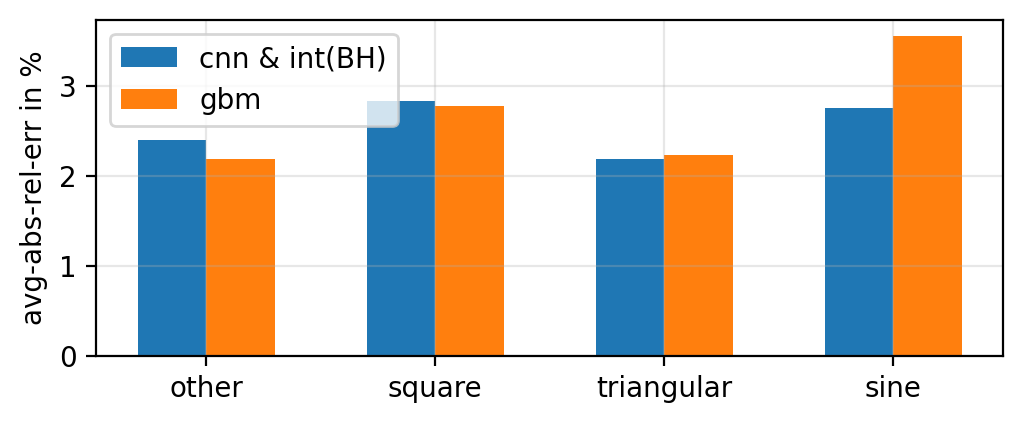

In [58]:
files_in_destination = os.listdir(DATA_SOURCE)
wav_labels = ["other", "square", "triangular", "sine"]

wav_abs_errors_cnn = [0, 0, 0, 0]
wav_abs_errors_gbm = [0, 0, 0, 0]

fig, ax = plt.subplots(layout='constrained', figsize=(5,2))

for filename in files_in_destination:
    df = pd.read_csv(os.path.join(DATA_SOURCE, filename))
    for i, wav_label in enumerate(wav_labels):
        wav_label = "wav_" + wav_label
        metrics_cnn = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["p_derived_from_h"])
        wav_abs_errors_cnn[i] += metrics_cnn['avg-abs-rel-err']
        
        metrics_gbm = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["ploss"])
        wav_abs_errors_gbm[i] += metrics_gbm['avg-abs-rel-err']        
        # print(wav_label, metrics['avg-abs-rel-err'])

x = np.arange(len(wav_labels))
w = 0.3
print(wav_labels, np.array((wav_abs_errors_cnn))/len(files_in_destination))
ax.bar(x-w/2, 100*np.array((wav_abs_errors_cnn))/len(files_in_destination), width=w, align='center', label="cnn & int(BH)")

print(wav_labels, np.array((wav_abs_errors_gbm))/len(files_in_destination))
ax.bar(x+w/2, 100*np.array((wav_abs_errors_gbm))/len(files_in_destination), width=w,align='center', label="gbm")
ax.set_xticks(x, wav_labels)
ax.legend()
ax.set_ylabel('avg-abs-rel-err in %')
# plt.plot()
# print(df)

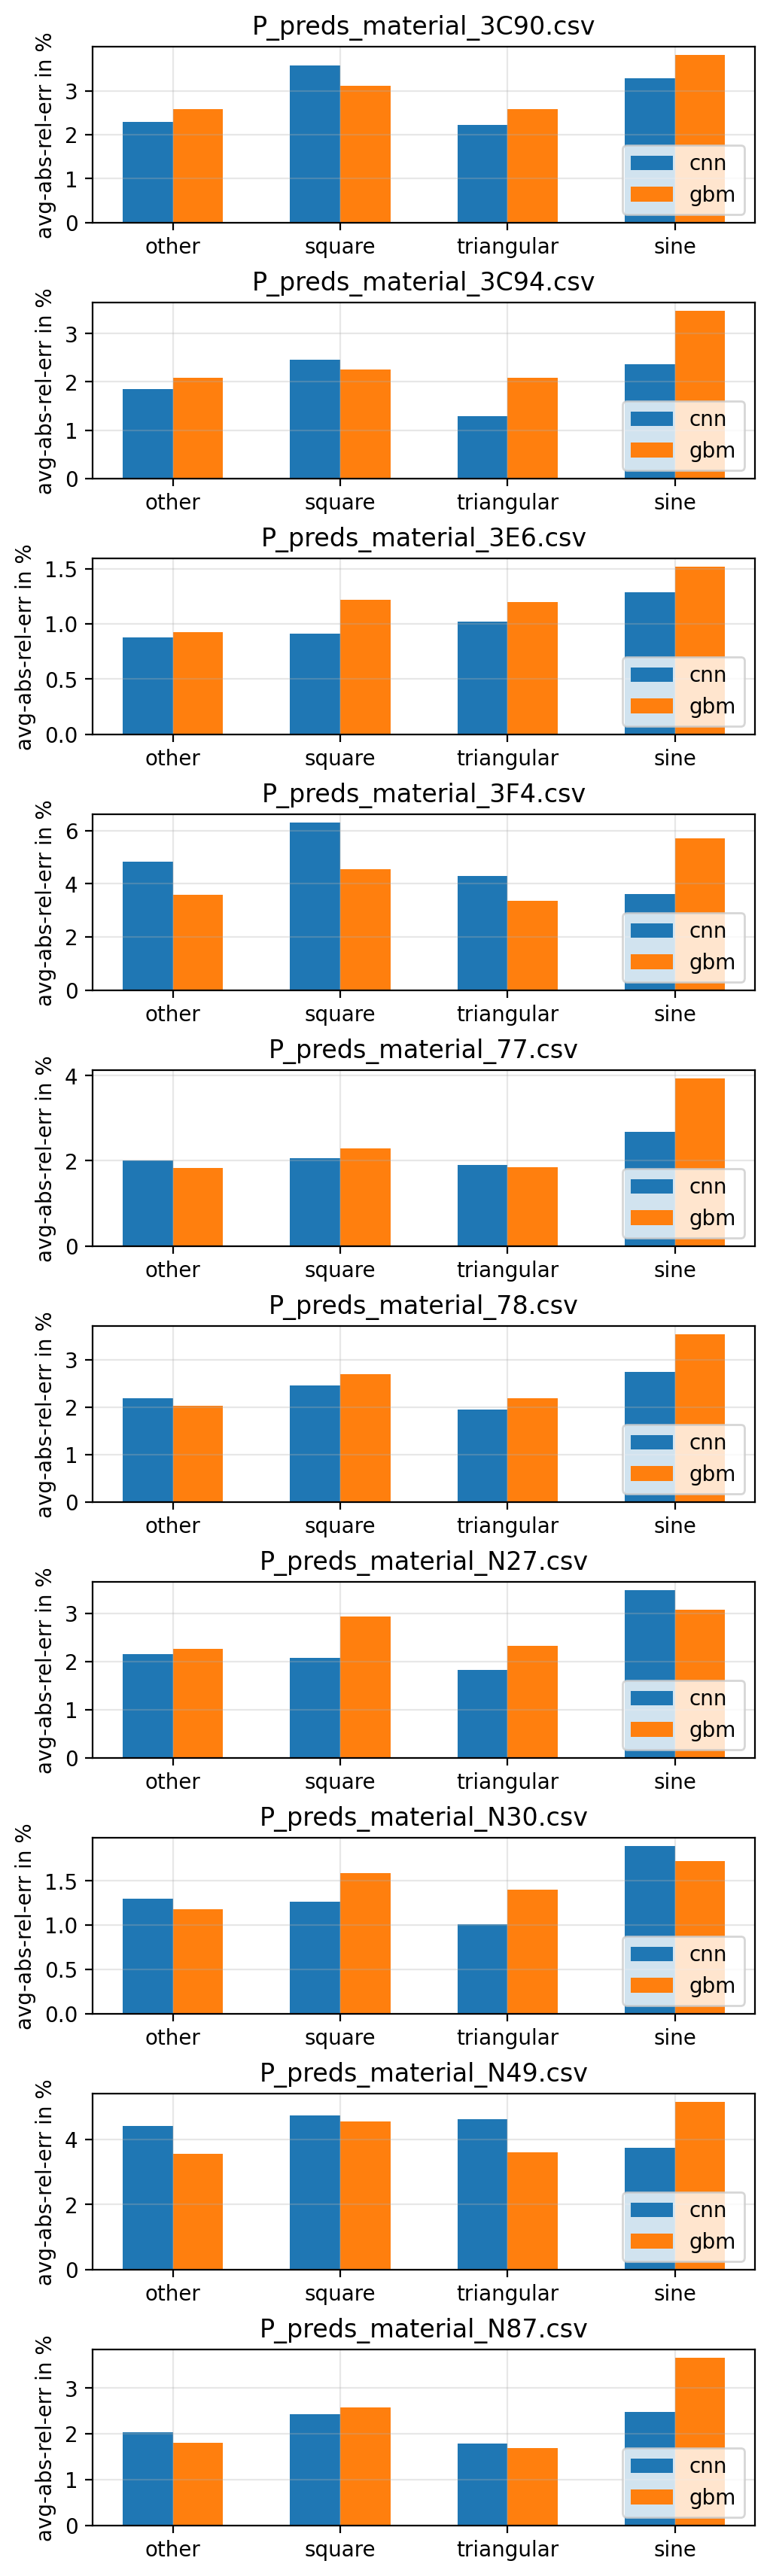

In [57]:
files_in_destination = os.listdir(DATA_SOURCE)
wav_labels = ["other", "square", "triangular", "sine"]

fig, ax = plt.subplots(nrows=10, ncols=1, layout='constrained', figsize=(5,17))
x = np.arange(len(wav_labels))
w = 0.3

for col, filename in enumerate(files_in_destination):
    df = pd.read_csv(os.path.join(DATA_SOURCE, filename))
    wav_abs_errors_cnn = [0, 0, 0, 0]
    wav_abs_errors_gbm = [0, 0, 0, 0]
    for i, wav_label in enumerate(wav_labels):
        wav_label = "wav_" + wav_label
        metrics_cnn = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["p_derived_from_h"])
        wav_abs_errors_cnn[i] += metrics_cnn['avg-abs-rel-err']
        
        metrics_gbm = calculate_metrics(pred=df.loc[df[wav_label]==1]["ploss_pred"], gtruth=df.loc[df[wav_label]==1]["ploss"])
        wav_abs_errors_gbm[i] += metrics_gbm['avg-abs-rel-err']        

        # print(wav_label, metrics['avg-abs-rel-err'])

        # print(wav_labels, np.array((wav_abs_errors_cnn))/len(files_in_destination))
    ax[col].bar(x-w/2, 100*np.array(wav_abs_errors_cnn), width=w, align='center', label="cnn")

    # print(wav_labels, np.array((wav_abs_errors_gbm))/len(files_in_destination))
    ax[col].bar(x+w/2, 100*np.array(wav_abs_errors_gbm) , width=w,align='center', label="gbm")
    ax[col].set_xticks(x, wav_labels)
    ax[col].legend(bbox_to_anchor=(0.5, 0., 0.5, 0.5))
    ax[col].set_title(filename)
    ax[col].set_ylabel('avg-abs-rel-err in %')


# plt.plot()
# print(df)